# Machine Learning - Football Events
### Project 2

#### Authors : 
* Gustavo Torres, up201706473@fe.up.pt
* Joaquim Rodrigues, up201704844@fe.up.pt
* Miguel Rosa


## Abstract

This project aims to build predictive machine learning models, with focus on classifiers and apply them to a football dataset, with the use of supervised learning. Machine learning consist in the capability of machines recognize certain patterns in the data with being previously programmed. Predictive models allow to predict the certaing features about the data given an input. Football is a rather random competition where a team can win a match and right after lose against the exact same team in the same conditions. Combining the two of this is this project's objective, combine predictive machine learning models with the randomness of football and it's events, to be able to predict several features of football games and events.



## 1. Introduction

In the context of curricular unit IART, Inteligncia Artificial, of MIEIC, Mestrado Integrado em Informática e Computação, our group were asked to make a project about Machine Learning, being able to choose from several options  where we would like to focus on. The group decision was to work on a classification problem using supervised learning, where the goals is to learn and classify/predict several features about the data, given input features. There was suggestions about the dataset we could work on, and we choose to work in a dataset about football games and its events.

Supervised learning is a major branch of machine learning algorithms, possibly the most used as of the writing of this paper, where the model learns by example and from there it can predict, based on previous seen data, the output of new data. During the training the models is fed with input data and its associated output, learning and identifying complex patterns in the data and to what output it maps to, so it can predict unseen data.

Supervised learning can be divided into 2 categories: classification and regression. This paper focus majorly in classification where the models tries to correctly identify to which class/category the data maps to. One of the most used approches to classification consists od binary data, whether a feature is true or not, for example, whether a shoot is goal or not. In this paper, several classifier models are used, with particular emphasis on K-Nearest Neighbors, Suport Vector Machines, Random Forest Classifiers and Neural Networks. In regression the models tries to map the feature in a continuos space, and can be used to predict quantities or used in statistics.

The dataset choosen is about football because it is a theme our group is interested on and would make our analysis more meaningful. Football is possibly the most popular sport around the world and like many sports, it is inherently random, its result are very unpredictable and so its events, which make the sport so interesting to so many around the world, nevertheless it is the sport the most people bet on.

Firstly, an exploratory dataset analysis, including class distribuion, values range and class analysis, was made in order to know the information avaialble and get familiar with the data we would work on and to identify possible problems where we could apply supervised learning and predict features from the dataset.

After the problems have been choosen, a data preprocessing was made in order to select meaning and useful features for the problem we were trying to predict, from handling NULL values, standardizing data and even creating new tables to hold new processed information (data transform). Now it was possible to train our classifier models and compare its result against the test data, using several metrics and erros.

Finally graphs and tables were made to support the results and compare the models.


## 2. Dataset

The dataset choosen is about football games and its events, and can be accesed [here](https://www.kaggle.com/secareanualin/football-events). It is hard to find a good database about football games and event, containg so many and so detailed information. The information was parsed using a regex from the description of the event resulting in a total 18 features about each game and 22 about each event. Some features are dependent on other features so they only have a value associated dependeding on the value of other features, for exemple, the shot_outcome only has a value when the event_type is an attemp (value  = 1), otherwise it is NULL.

The dataset consisting of a total of 10112 games and 941009 events, during 5 years, from the season 2011/2012 to 2016/2017 of the 5 major european leagues, England, Spain, France, Germany, Italy.

There are two files, one with each of the available games, and other one with each of the major events of the previous games. Each game has a unique identifier that is shared with each event of that game, making it possible to map an event to a game and even joing data as needed.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#load data from files
events = pd.read_csv('./data/' + 'events.csv')
ginf = pd.read_csv('./data/' + 'ginf.csv')

In [2]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

In [3]:
ginf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10112 entries, 0 to 10111
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_odsp    10112 non-null  object 
 1   link_odsp  10112 non-null  object 
 2   adv_stats  10112 non-null  bool   
 3   date       10112 non-null  object 
 4   league     10112 non-null  object 
 5   season     10112 non-null  int64  
 6   country    10112 non-null  object 
 7   ht         10112 non-null  object 
 8   at         10112 non-null  object 
 9   fthg       10112 non-null  int64  
 10  ftag       10112 non-null  int64  
 11  odd_h      10112 non-null  float64
 12  odd_d      10112 non-null  float64
 13  odd_a      10112 non-null  float64
 14  odd_over   977 non-null    float64
 15  odd_under  977 non-null    float64
 16  odd_bts    977 non-null    float64
 17  odd_bts_n  977 non-null    float64
dtypes: bool(1), float64(7), int64(3), object(7)
memory usage: 1.1+ MB


In [4]:
## Utility function to plot bar plots with similar configuration
def plot_barplot(data, x_ticks, x_labels, y_labels, title, color='muted', num=10, figsize=8):
    ## Set standard style as whitegrid (this also could be customized via param)
    sns.set_style("whitegrid")
    ## Set a figure with custom figsize
    plt.figure(figsize=(num, figsize))
    ## Plottin data
    ax = sns.barplot(x = [j for j in range(0, len(data))], y=data.values, palette=color)
    ## Setting ticks extracted from data indexes
    ax.set_xticks([j for j in range(0, len(data))])
    ## Set labels of the chart
    ax.set_xticklabels(x_ticks, rotation=45)
    ax.set(xlabel = x_labels, ylabel = y_labels, title = title)
    ax.plot();
    plt.tight_layout()

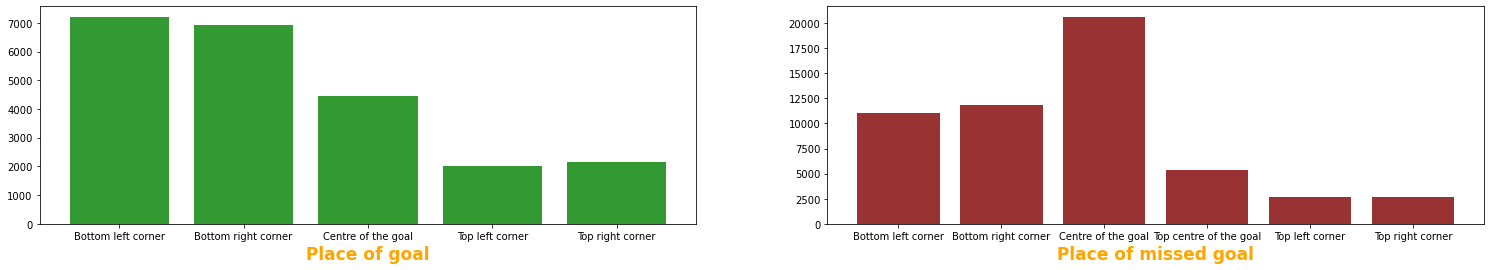

In [5]:
## Shot place goals
g_shot_place = pd.Series(['Bottom left corner','Bottom right corner','Centre of the goal','Top left corner','Top right corner'], index=[[item for item in range(1, 6)]])
## Shot place not goals
ng_shot_place = pd.Series(['Bottom left corner','Bottom right corner','Centre of the goal','Top centre of the goal','Top left corner','Top right corner'], index=[[item for item in range(1, 7)]])

on_target_attemps = events[(events.event_type == 1) & (events.shot_outcome == 1)]
goal_shot_places = on_target_attemps[(on_target_attemps.is_goal == 1)].iloc[:,[-8]].groupby('shot_place')['shot_place'].count()
not_goal_shot_places = on_target_attemps[(on_target_attemps.is_goal == 0)].iloc[:,[-8]].groupby('shot_place')['shot_place'].count()

plt.figure(figsize=(40, 4))
plt.subplot(131)
plt.bar(g_shot_place, goal_shot_places.ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Place of goal',fontweight='bold', color = 'orange', fontsize='17')
plt.subplot(132)
plt.bar(ng_shot_place, not_goal_shot_places.ravel(),color=(0.6,0.2,0.2,1))
plt.xlabel('Place of missed goal',fontweight='bold', color = 'orange', fontsize='17')
del g_shot_place
del ng_shot_place

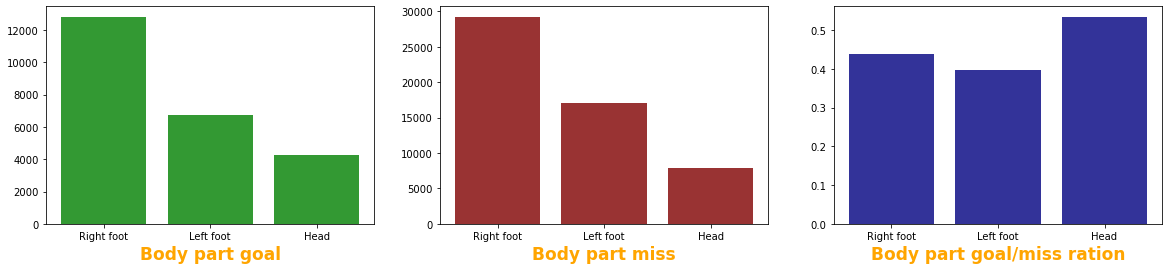

In [6]:
bodypart = pd.Series(['Right foot','Left foot','Head'], index=[[item for item in range(1, 4)]])
goal_bodypart = on_target_attemps[(on_target_attemps.is_goal == 1)].iloc[:,[-4]].groupby('bodypart')['bodypart'].count()
not_goal_bodypart = on_target_attemps[(on_target_attemps.is_goal == 0)].iloc[:,[-4]].groupby('bodypart')['bodypart'].count()
goal_bodypart/not_goal_bodypart

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.bar(bodypart, goal_bodypart.ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Body part goal',fontweight='bold', color = 'orange', fontsize='17')
plt.subplot(132)
plt.bar(bodypart, not_goal_bodypart.ravel(),color=(0.6,0.2,0.2,1))
plt.xlabel('Body part miss',fontweight='bold', color = 'orange', fontsize='17')
plt.subplot(133)
plt.bar(bodypart, (goal_bodypart/not_goal_bodypart).ravel(),color=(0.2,0.2,0.6,1))
plt.xlabel('Body part goal/miss ration',fontweight='bold', color = 'orange', fontsize='17')
del goal_bodypart
del not_goal_bodypart

In [7]:
leagues = pd.Series(['Bundesliga' , 'Premier League' , 'League 1', ' Serie A' , 'La Liga'], index=[[item for item in range(1, 6)]])
merge = events.merge(ginf, how="left");
fouls_per_league = merge[(merge.event_type == 3)].groupby('league')['league'].count()
cards_per_league = merge[(merge.event_type == 4) |(merge.event_type == 5) | (merge.event_type == 6)].groupby('league')['league'].count()
games_per_league = ginf.groupby('league')['league'].count()
fouls_per_game_per_league = fouls_per_league/games_per_league
cards_per_game_per_league = cards_per_league/games_per_league


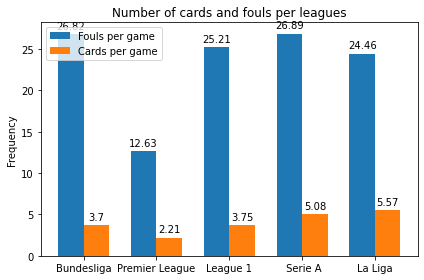

In [8]:

x = np.arange(len(leagues))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fouls_per_game_per_league, width , label='Fouls per game')
rects2 = ax.bar(x + width/2, cards_per_game_per_league, width, label='Cards per game')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Number of cards and fouls per leagues')
ax.set_xticks(x)
ax.set_xticklabels(leagues)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
#delete
del fouls_per_game_per_league
del cards_per_game_per_league

[0 1 2 3 4]


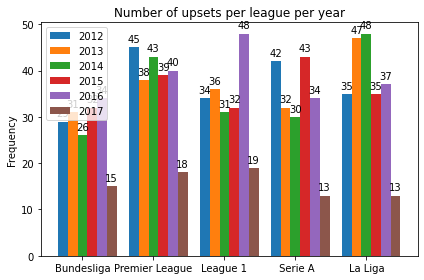

In [9]:
seasons = ['2012' , '2013' , '2014' , '2015' , '2016' , '2017'];

upsets = ginf[((ginf.fthg > ginf.ftag) & (ginf.odd_h/ginf.odd_a > 1.8)) | ((ginf.fthg < ginf.ftag) & (ginf.odd_a/ginf.odd_h > 1.8))]

x = np.arange(len(leagues))  # the label locations
print(x)
width = 0.55  # the width of the bars

fig, ax = plt.subplots()

i = 0
for season in seasons:
    upsets_per_season_per_league = upsets[upsets.season == int(season)].groupby('league')['league'].count()
    rects = ax.bar(x - width/2 + i*width/len(season) , upsets_per_season_per_league, width / len(season), label=season)
    autolabel(rects)
    i = i + 1
    
    
ax.set_ylabel('Frequency')
ax.set_title('Number of upsets per league per year')
ax.set_xticks(x)
ax.set_xticklabels(leagues)
ax.legend()

fig.tight_layout()

plt.show()
del upsets

Text(0.5, 0, 'Average gouls per game')

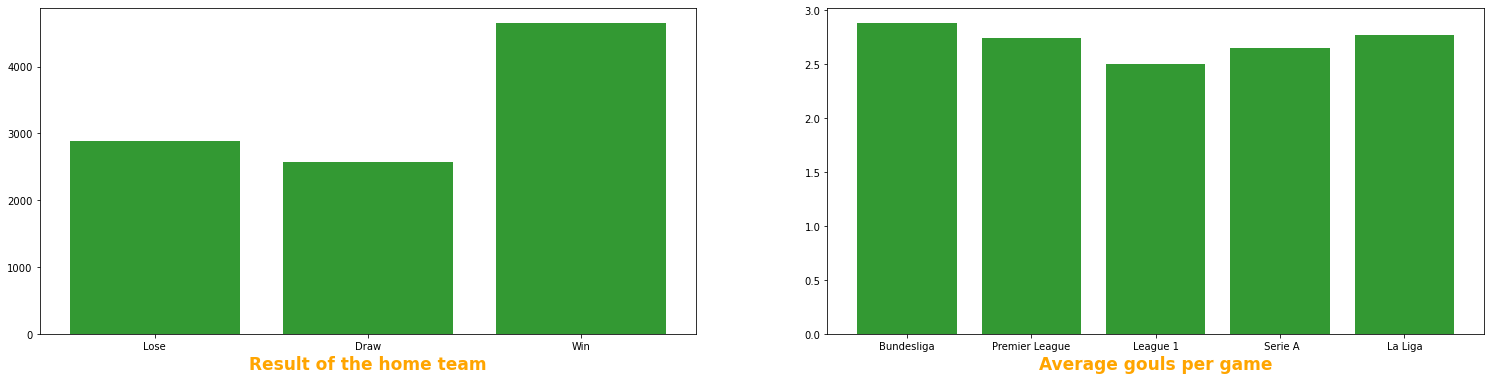

In [10]:
ginf_extra = ginf.copy()
ginf_extra['dif'] = ginf_extra['fthg'] - ginf_extra['ftag']
ginf_extra['total'] = ginf_extra['fthg'] + ginf_extra['ftag']

conditions = [ginf_extra['dif'] > 0 , ginf_extra['dif'] == 0, ginf_extra['dif'] < 0]
choices = [1 , 0 , -1]
ginf_extra['result'] = np.select(conditions,choices,default=np.nan)
homeResult = ginf_extra.groupby('result')['result'].count()

gouls_per_league_per_game = ginf_extra[['total','league']].groupby('league')['total'].sum()/games_per_league

results = ['Lose' , 'Draw' , 'Win']

plt.figure(figsize=(40, 6))
plt.subplot(131)
plt.bar(results, homeResult.ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Result of the home team',fontweight='bold', color = 'orange', fontsize='17')
plt.subplot(132)
plt.bar(leagues, gouls_per_league_per_game.ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Average gouls per game',fontweight='bold', color = 'orange', fontsize='17')



In [11]:
shots = events[events.event_type == 1]

In [12]:
most_offensive_player = shots.groupby('player')['player'].count().sort_values(ascending = False)
most_effective_player = (shots[shots.is_goal == 1].groupby('player')['player'].count().where(lambda x : x>20).dropna()/most_offensive_player).dropna().sort_values(ascending = False)

In [13]:
most_effective_player

player
gonzalo rodriguez      0.305556
bas dost               0.262774
dario cvitanich        0.258621
javier hernandez       0.250000
miroslav klose         0.248780
                         ...   
philippe coutinho      0.073892
lorenzo insigne        0.071066
pedro leon             0.069307
radja nainggolan       0.055556
alessandro diamanti    0.054404
Name: player, Length: 291, dtype: float64

After an analysis over the dataset and an acknowkledge of the distribution, meaning and relations of its features has been done, the group decided to look with more detail into de following predictive problems:
* Predict the winning team
* Predict the moment of the first goal
* Predict whether both teams score
* Predict whether there will be more or less than 2.5 goals
* Predict whether an attemp will result in a goal
* Predict whether an attemp will result in a save

These problems were choosen because ofthe existence of data and features alligned with the problem we are trying to build a model and predict and because of its meaning. The first 4 problems are classical betting options, where many people bet in these options. The last two problems rely on the prediction of whether an attemp will result in goal or not, also known as Expected Goals Model, or whether an attemp will result in a save or not, based in the previous model, allowing then to further data analysis about players and teams.

## 3. Problems

In this section it will be discussed the approach to each of the problems mentioned previously and an evaluation of the results obtain. There is a different approach to each of these problems given that they predict different features and different data can be extracted from each problem, which will be discussed. Several models were compared in order to find the one that fits better to a given problem.

In [14]:
#import necessary libraries
import pandas as pd
import numpy as np

from sklearn import preprocessing

import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,recall_score,precision_score, f1_score

In [15]:
#definition of useful methods
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

### 3.1 Predict the winning team

This problem is possibly the most known problem in any sports because it would be very valuable to know who the winner would be in a given match, whether for betting or for investimens, and so on. It is the most bet option because of its simplicity, only three simple options (Win, Draw, Lose) and meaning to thoose who bet. However it's results are very unpredictable and some would argue that they have some randomness associated, there are so many internal and external factors to take into account and even then no predictor would accurtly predict every game. A team that has won a game can, right after, in the next game, in the same stadium, against the same team, loose that game.

#### Approach

For this problem tha dataset consisted of the games played over the course of 5 years, between 2011/2012 until 2016/2017, of the five major european leagues, suming to a total of 10112 games. 
There are two necessary input features for this problem, the home team and the away team, in order to be able to predict who will win.
The output feature will be in order to the home team, representing the result of the home team, a Win means that the home team won, a Lose means that the home team lost. For this representation the output (Win, Draw,Lose) will be transformed into (1,0,-1), because it will be usefull for future use.

In [16]:
games = ginf[['ht','at','fthg','ftag']].copy()
games['result'] = games['fthg'] - games['ftag']

col = 'result'
conditions = [games[col] > 0 , games[col] == 0, games[col] < 0]
choices = [1 , 0 , -1]
games['result'] = np.select(conditions,choices,default=np.nan)
games.head()

,ht,at,fthg,ftag,result
0,Borussia Dortmund,Hamburg SV,3,1,1.0
1,FC Augsburg,SC Freiburg,2,2,0.0
2,Werder Bremen,Kaiserslautern,2,0,1.0
3,Paris Saint-Germain,Lorient,0,1,-1.0
4,Caen,Valenciennes,1,0,1.0


For an initial approach we will only take into account the home team and away team.
As we can see the **ht** and **at** features are categorical, so we need to convert them to binary dummies.

In [17]:
games = games[['ht','at','result']]
games_dummies = pd.get_dummies(games, columns=['ht','at'])
games_dummies.head()

,result,ht_AC Ajaccio,ht_AC Milan,ht_AJ Auxerre,ht_AS Monaco,ht_AS Nancy Lorraine,ht_AS Roma,ht_Alaves,ht_Almeria,ht_Angers,...,at_Valenciennes,at_VfB Stuttgart,at_VfL Wolfsburg,at_Villarreal,at_Watford,at_Werder Bremen,at_West Brom,at_West Ham,at_Wigan,at_Wolves
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


As we can see we end up to a total of 295 columns as part of the input and one for the output.
Next we will split the data into the training one and the test one, so we can train our model.

In [18]:
X = games_dummies.iloc[:,1:]
y = games_dummies.iloc[:,:1].values.ravel()
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1,stratify=y)
X_train

(10112, 295)
(10112,)


,ht_AC Ajaccio,ht_AC Milan,ht_AJ Auxerre,ht_AS Monaco,ht_AS Nancy Lorraine,ht_AS Roma,ht_Alaves,ht_Almeria,ht_Angers,ht_Arsenal,...,at_Valenciennes,at_VfB Stuttgart,at_VfL Wolfsburg,at_Villarreal,at_Watford,at_Werder Bremen,at_West Brom,at_West Ham,at_Wigan,at_Wolves
4786,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5204,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For training and tunning our models we will GridSearchCV, which will conduct an exaustive search over the hiperparameters and options specified, in order to find the best that fit our data.

In [19]:
models = []

KNNhyperparameters = {'kneighborsclassifier__n_neighbors' : [41,81, 101]}
SVMhyperparameters = {'svc__kernel' : ['linear','rbf']}
MLPhyperparameters = {'mlpclassifier__solver' : ['adam','sgd'] , 'mlpclassifier__hidden_layer_sizes' : [(30,20,3) , (5,5,5,5,5)]}

models.append(('KNN' , KNeighborsClassifier(), KNNhyperparameters))
models.append(('SVC' , svm.SVC(), SVMhyperparameters))
models.append(('MLP' , MLPClassifier(max_iter = 1000) , MLPhyperparameters ))

for name, model, hyper in models:
    pipeline = make_pipeline(model)
    clf = GridSearchCV(pipeline, hyper)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Model name: " + name)
    print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))
    print("Mean square error: {:.4f}".format(mean_squared_error(y_test, y_pred)))
    #print('Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
    #print('Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
    #print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
    print('F-measure: {:.4f}'.format(f1_score(y_test, y_pred, average='micro')))
    print('The accuracy of classifying is {:.3f} %'.format(clf.score(X_test, y_test)*100))
    print("\n")

Model name: KNN
R2 score: -0.6567
Mean square error: 1.1850
Precision: 0.5090
Recall: 0.5090
Accuracy: 0.5090
F-measure: 0.5090
The accuracy of classifying is 50.904 %


Model name: SVC
R2 score: -0.6002
Mean square error: 1.1446
Precision: 0.4986
Recall: 0.4986
Accuracy: 0.4986
F-measure: 0.4986
The accuracy of classifying is 49.859 %




c:\users\gustavo\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model name: MLP
R2 score: -0.9545
Mean square error: 1.3980
Precision: 0.4596
Recall: 0.4596
Accuracy: 0.4596
F-measure: 0.4596
The accuracy of classifying is 45.960 %




The KNN model had the best accuracy, however it is not worth to dig into details because as we can see the previous data has very little features, only the teams that were playing against each other, so maybe with more input data our model can understand the data better and thus make better predictions. One important feature to join is the season, almost any team keeps its formation from 2011/2012 until 2016/2017, there player trades, the player improve or decline and even the coach changes, so adding the season can lead to result improvements. Furthermore, we have acess to the odds for each possible outcome before each match, odds take into account external factors that we don't have access, so it might be profitable to include that into our data set.

In [20]:
games_2 = ginf[['ht','at','fthg','ftag','season','odd_h','odd_d','odd_a']].copy()
games_2['result'] = games_2['fthg'] - games_2['ftag']

col = 'result'
conditions = [games_2[col] > 0 , games_2[col] == 0, games_2[col] < 0]
choices = [1 , 0 , -1]
games_2['result'] = np.select(conditions,choices,default=np.nan)

games_2 = games_2[['ht','at','result','season','odd_h','odd_d','odd_a']]
games_dummies_2 = pd.get_dummies(games_2, columns=['ht','at'])
X = games_dummies_2.iloc[:,1:]
y = games_dummies_2.iloc[:,:1].values.ravel()
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1,stratify=y)
X_train

(10112, 299)
(10112,)


,season,odd_h,odd_d,odd_a,ht_AC Ajaccio,ht_AC Milan,ht_AJ Auxerre,ht_AS Monaco,ht_AS Nancy Lorraine,ht_AS Roma,...,at_Valenciennes,at_VfB Stuttgart,at_VfL Wolfsburg,at_Villarreal,at_Watford,at_Werder Bremen,at_West Brom,at_West Ham,at_Wigan,at_Wolves
4786,2014,2.49,3.40,3.40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,2014,2.12,3.50,4.22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239,2012,4.09,3.25,2.24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5152,2014,3.55,3.95,2.25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5204,2014,1.66,4.10,6.90,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,2014,1.70,4.40,5.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7535,2016,3.50,3.42,2.52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6043,2015,2.00,3.48,5.10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7408,2016,2.08,3.65,4.25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
models = []

KNNhyperparameters = {'kneighborsclassifier__n_neighbors' : [41,81, 101]}
SVMhyperparameters = {'svc__kernel' : ['linear','rbf']}
MLPhyperparameters = {'mlpclassifier__solver' : ['adam','sgd'] , 'mlpclassifier__hidden_layer_sizes' : [(30,20,3) , (5,5,5,5,5)]}

models.append(('KNN' , KNeighborsClassifier(), KNNhyperparameters))
models.append(('SVC' , svm.SVC(), SVMhyperparameters))
models.append(('MLP' , MLPClassifier(max_iter = 800) , MLPhyperparameters ))

for name, model, hyper in models:
    pipeline = make_pipeline(model)
    clf = GridSearchCV(pipeline, hyper)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Model name: " + name)
    print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))
    print("Mean square error: {:.4f}".format(mean_squared_error(y_test, y_pred)))
    print('Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
    print('Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
    print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
    print('F-measure: {:.4f}'.format(f1_score(y_test, y_pred, average='micro')))
    print('The accuracy of classifying is {:.3f} %'.format(clf.score(X_test, y_test)*100))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test,y_pred))
    print('Report:')
    print(classification_report(y_test,y_pred))
    print(clf.best_params_)
    print("\n")

Model name: KNN
R2 score: -0.5291
Mean square error: 1.0938
Precision: 0.5282
Recall: 0.5282
Accuracy: 0.5282
F-measure: 0.5282
The accuracy of classifying is 52.825 %
Confusion Matrix:
[[ 475   42  495]
 [ 219   58  624]
 [ 239   51 1337]]
Report:
              precision    recall  f1-score   support

        -1.0       0.51      0.47      0.49      1012
         0.0       0.38      0.06      0.11       901
         1.0       0.54      0.82      0.65      1627

    accuracy                           0.53      3540
   macro avg       0.48      0.45      0.42      3540
weighted avg       0.49      0.53      0.47      3540

{'kneighborsclassifier__n_neighbors': 101}


Model name: SVC
R2 score: -0.5208
Mean square error: 1.0879
Precision: 0.5105
Recall: 0.5105
Accuracy: 0.5105
F-measure: 0.5105
The accuracy of classifying is 51.045 %
Confusion Matrix:
[[ 455   97  460]
 [ 230   89  582]
 [ 246  118 1263]]
Report:
              precision    recall  f1-score   support

        -1.0       0.

c:\users\gustavo\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


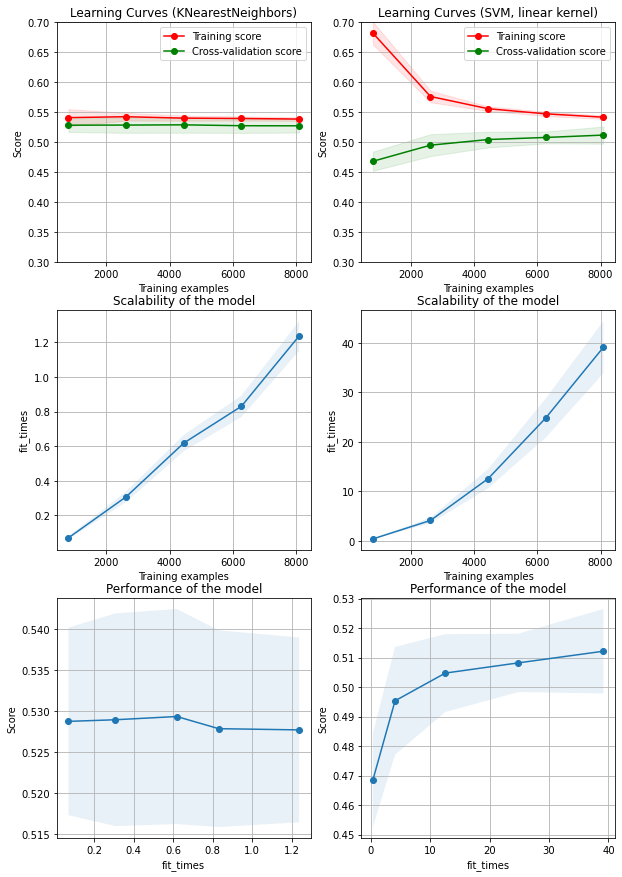

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (KNearestNeighbors)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier(n_neighbors = 101)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.3, 0.7),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, linear kernel)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = svm.SVC(kernel = 'linear')
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.3, 0.7),
                    cv=cv, n_jobs=4)

plt.show()

As we can see the KNearestNeighbors behaved better in the overall dataset.

### 3.2 Predict the moment of first goal

This problem consists of determining the moment of the first goal, which is also a rather random event because nothing but events during the game can help to determine when a goal will happen but even that is subject of luck and chance.

#### Approach

#### Experimental Evaluation

### 3.3 Predict whether both teams score
#### Approach

### 3.4 Predict the whether there will be more or less than 2.5 goals
#### Approach

#### Experimental Evaluation

### 3.5 Predict whether an attemp will result in a goal
#### Approach

#### Experimental Evaluation

### 3.6 Predict whether an attemp will result in a save
#### Approach

#### Experimental Evaluation

## 4. Conclusion

## References